In [12]:
import datetime
import pandas as pd
import fix_yahoo_finance as yf
stocks = ["MSFT"]
start = datetime.datetime(2020,3,1)
end = datetime.datetime(2021,3,1)
data = yf.download(stocks, start=start, end=end)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,165.309998,172.919998,162.309998,172.789993,170.657700,71030800
2020-03-03,173.800003,175.000000,162.259995,164.509995,162.479874,71677000
2020-03-04,168.490005,170.699997,165.619995,170.550003,168.445358,49814400
2020-03-05,166.050003,170.869995,165.690002,166.270004,164.218155,47817300
2020-03-06,162.610001,163.110001,156.000000,161.570007,159.576172,72821100
...,...,...,...,...,...,...
2021-02-22,237.419998,237.929993,232.399994,234.509995,233.969742,36446900
2021-02-23,230.330002,234.830002,228.729996,233.270004,232.732605,30228700
2021-02-24,230.009995,235.199997,229.000000,234.550003,234.009659,26339700


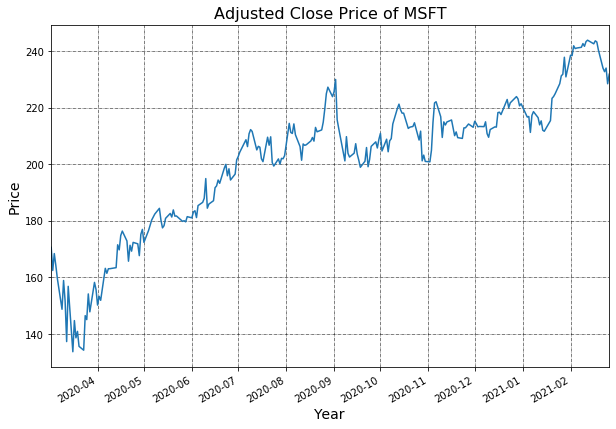

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 7))
# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

In [14]:
import numpy as np

data['Log returns'] = np.log(data['Adj Close']/data['Adj Close'].shift())

In [15]:
volatility_12m = data['Log returns'].std()*252**.5
volatility_12m

0.4291919358217868

Text(0.5, 1.0, 'MSFT 12m volatility: 42.92%')

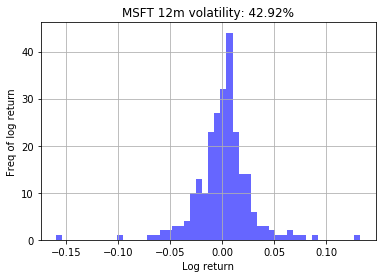

In [17]:
str_vol = str(round(volatility_12m, 4)*100)

fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("MSFT 12m volatility: " + str_vol + "%")

In [18]:
volatility_6m = data['Log returns'].std()*126**.5
volatility_6m

0.3034845282501669

Text(0.5, 1.0, 'MSFT 6m volatility: 30.349999999999998%')

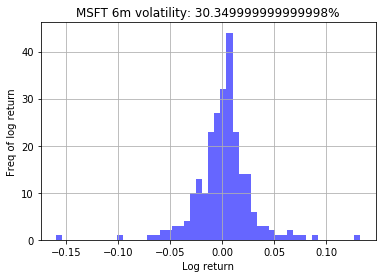

In [19]:
str_vol = str(round(volatility_6m, 4)*100)

fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("MSFT 6m volatility: " + str_vol + "%")

In [22]:
#Monte Carlo Simulation (MC)
import datetime
import math
from random import gauss
from math import exp, sqrt

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

def call_payoff(S_T,K):
    return max(0.0,S_T-K)

S = 170.6577 # underlying price
v = 0.4292 # vol of 42.92%
r = 0.0014 # rate of 0.14%
T = 30
K = 173
simulations = 90000
payoffs = []
discount_factor = math.exp(-r * T)

for i in list(range(simulations)):
    S_T = generate_asset_price(S,v,r,T)
    payoffs.append(
        call_payoff(S_T, K)
    )

price = discount_factor * (sum(payoffs) / float(simulations))
print('Price: %.4f' % price)

Price: 134.7647


In [23]:
#Black Schole Model (BSM)
import random
from math import exp, sqrt

def gbm(S, v, r, T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * random.gauss(0,1.0))

def binary_call_payoff(K, S_T):
    if S_T >= K:
        return 1.0
    else:
        return 0.0

# parameters
S = 170.6577 # underlying price
v = 0.4292 # vol of 42.92%
r = 0.0014 # rate of 0.14%
K = 173
maturity = 30
K = 1960 # strike
simulations = 50000
payoffs = 0.0

# run simultaion
for i in list(range(simulations)):
    S_T = gbm(S, v, r, maturity)
    payoffs += binary_call_payoff(K, S_T)

# find prices
option_price = exp(-r * maturity) * (payoffs / float(simulations))

print('Price: %.8f' % option_price)

Price: 0.01403785


In [24]:
from scipy.stats import norm
import numpy as np
def d(sigma,S,K,r,T):
    d1=1/(sigma*np.sqrt(T))*(np.log(S/K)+(r+sigma**2/2)*T)
    d2=d1-sigma*np.sqrt(T)
    return d1,d2

def Price(S, K, r, sigma, T,d1,d2):
    P=-norm.cdf(-d1)*S+norm.cdf(-d2)*K*np.exp(-r*T)
    return P
def delta(d_1):
    return -norm.cdf(-d_1)
#Input parameters:
S = 170.6577 # underlying price
sigma = 0.4292 # vol of 42.92%
r = 0.0014 # rate of 0.14%
K = 173
T=30 #time to maturity
d1,d2=d(sigma,S,K,r,T)
print("d1= ", d1)
print("d2= ", d2)

d1=  1.187479945963986
d2=  -1.163345270848187


In [25]:
delta_put=delta(d1)
print("Delta= ", delta_put)

Delta=  -0.1175191810991087


In [26]:
def gamma(d2,S,K,sigma,r,T):
    return(K*np.exp(-r*T)*(norm.pdf(d2)/(S**2*sigma*np.sqrt(T))))
print("Gamma= ", gamma(d2,S,K,sigma,r,T))

Gamma=  0.0004913179602996873


In [27]:
def theta(d1,d2,S,K,sigma,r,T):
    theta=-S*sigma*norm.pdf(-d1)/(2*np.sqrt(T))+r*K*np.exp(-r*T)*norm.cdf(-d2)
    return theta
print("Theta= ", theta(d1,d2,S,K,sigma,r,T))    

Theta=  -1.114139774749777


In [28]:
def rho(K,r,T,d2):
    rho=-K*T*np.exp(-r*T)*norm.cdf(-d2)
    return rho
print("Rho= ", rho(K,r,T,d2))

Rho=  -4367.681470223772


In [29]:
def vega(K,r,T,d2):
    vega=K*np.exp(-r*T)*norm.pdf(d2)*np.sqrt(T)
    return vega
print("Vega= ", vega(K,r,T,d2))

Vega=  184.24486160674095
